In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
from typing import Set

import matplotlib.pyplot as plt

from c4a0.training import TrainingGen
from c4a0_rust import PlayGamesResult  # type: ignore

In [45]:
def gen_to_pos_set(gen: TrainingGen) -> Set[str]:
    return set(
        sample.pos_str()
        for result in gen.get_games(base_dir).results  # type: ignore
        for sample in result.samples
    )

In [43]:
base_dir = "../../training"
gens = TrainingGen.load_all(base_dir)
games = [gen.get_games(base_dir) for gen in gens]
gens, games = zip(
    *[
        (gen, game)
        for gen, game in zip(gens, games)
        if game is not None
    ]
)

gens = list(gens)
games = list(games)
gen_numbers = list(reversed(range(len(gens))))

In [ ]:
set_sizes = [len(gen_to_pos_set(gen)) for gen in gens]

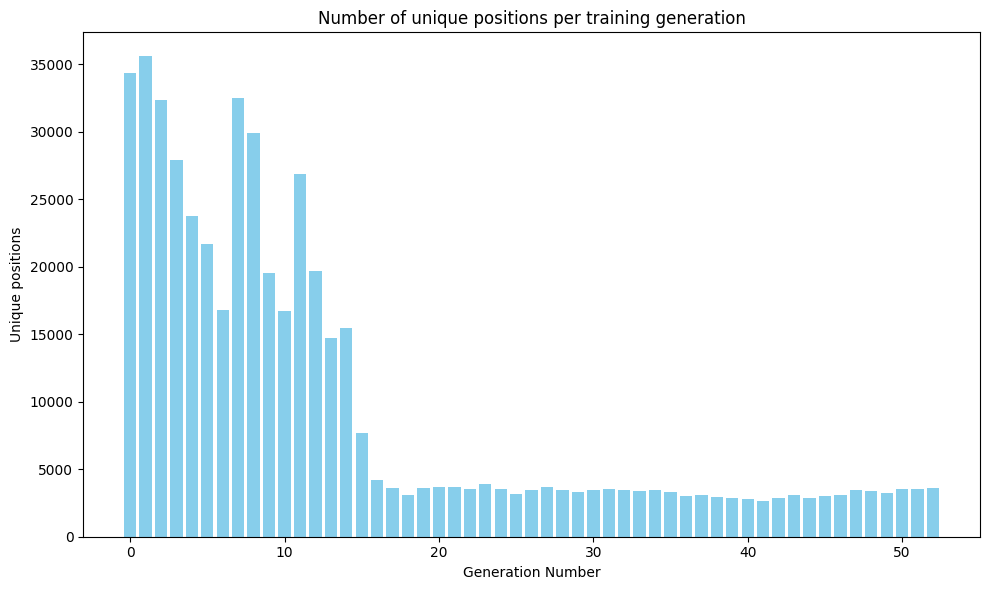

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(gen_numbers, set_sizes, color='skyblue')
plt.xlabel('Generation Number')
plt.ylabel('Unique positions')
plt.title('Number of unique positions per training generation')
plt.tight_layout()
plt.show()